In [17]:
#Find all importent feature from Numerical , Date, Cetagorical data  by Xgboost 

In [84]:
import pickle
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   

import matplotlib.pylab as plt
%matplotlib inline


In [85]:
#Import all train data those are concated together and the Labels.

y_all = pd.read_csv("D:/Project/Sample data/pkl/labels_y.csv", index_col=0,)
pkl_file3 = open('D:/Project/Sample data/train_all_df/train_all_df.pkl', 'rb')
X_all = pickle.load(pkl_file3)

In [86]:
# Replce NAN with "MeanValue"
#X_all=X_all.fillna(X_all.mean())

In [87]:
a = y_all["Response"].values

In [88]:
#Check number of noraml and anomaly in the test data after sampling

unique, counts = np.unique(y_all, return_counts=True)
dict(zip(unique, counts))

{0: 7961, 1: 39}

In [89]:
#Return true if there is null values
print(np.any(np.isnan(X_all)))

True


In [90]:
X_all.head()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3__S49__F4225,L3__S49__F4227,L3__S49__F4229,L3__S49__F4230,L3__S49__F4232,L3__S49__F4234,L3__S49__F4235,L3__S49__F4237,L3__S49__F4239,L3__S49__F4240
Id,,,,,,,,,,,,,,,,,,,,,
428,0.115,0.063,-0.215,-0.179,0.031,-0.112,-0.030,-0.112,-0.021,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046,-0.023,-0.004,0.003,-0.016,0.031,0.070,0.008,0.008,0.051,-0.072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,-0.134,-0.078,0.003,-0.016,0.118,-0.021,0.022,0.088,0.240,0.067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,0.049,0.019,-0.179,-0.216,-0.100,-0.294,-0.022,-0.072,-0.021,0.158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
X_all.shape

(8000, 4264)

In [92]:
#Column with NAN return code 
Column_With_NAN=X_all.loc[:, X_all.isna().any()]

In [93]:
#Is there any NAN in column Code?
X_all.isnull().values.any()


True

In [94]:
Column_With_NAN.head()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3__S49__F4225,L3__S49__F4227,L3__S49__F4229,L3__S49__F4230,L3__S49__F4232,L3__S49__F4234,L3__S49__F4235,L3__S49__F4237,L3__S49__F4239,L3__S49__F4240
Id,,,,,,,,,,,,,,,,,,,,,
428,0.115,0.063,-0.215,-0.179,0.031,-0.112,-0.030,-0.112,-0.021,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046,-0.023,-0.004,0.003,-0.016,0.031,0.070,0.008,0.008,0.051,-0.072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,-0.134,-0.078,0.003,-0.016,0.118,-0.021,0.022,0.088,0.240,0.067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,0.049,0.019,-0.179,-0.216,-0.100,-0.294,-0.022,-0.072,-0.021,0.158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Drop column which contains NAN  
#X_all=X_all.dropna(axis='columns')

In [96]:
X_all.shape

(8000, 4264)

In [97]:
X_all.isnull().values.any()

True

In [37]:
def modelfit(alg, X_all, y_all, useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_all, label=y_all)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=1)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_all, y_all, eval_metric=['auc'])
    
    print(alg)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_all)
    dtrain_predprob = alg.predict_proba(X_all)[:,1]
        
    #Print model report:
    print("\nModel Report")
    #print "Accuracy : %.4g" % metrics.accuracy_score(y_all, X_all)
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_all, dtrain_predprob))

   # print(alg.booster())                
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)[:25]
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    plt.savefig('D:/Project_data_all_L3S/Process_data/Train_num.png')
    print(feat_imp.to_string())

[0]	train-auc:0.836883+0.0228976	test-auc:0.62729+0.0369515
[1]	train-auc:0.906753+0.0101542	test-auc:0.629641+0.0333655
[2]	train-auc:0.954578+0.00413982	test-auc:0.652526+0.0336449
[3]	train-auc:0.975346+0.0032959	test-auc:0.674659+0.0578784
[4]	train-auc:0.982261+0.00575406	test-auc:0.681996+0.0510314
[5]	train-auc:0.988891+0.006768	test-auc:0.663105+0.0499083
[6]	train-auc:0.991058+0.00428645	test-auc:0.661206+0.0577858
[7]	train-auc:0.99234+0.00409485	test-auc:0.664571+0.0615121
[8]	train-auc:0.994436+0.00202184	test-auc:0.668815+0.0817746
[9]	train-auc:0.995867+0.0011903	test-auc:0.664771+0.0747847
[10]	train-auc:0.997+0.00079702	test-auc:0.669783+0.0680184
[11]	train-auc:0.997602+0.0007669	test-auc:0.663241+0.0660373
[12]	train-auc:0.998231+0.000427034	test-auc:0.660031+0.0630878
[13]	train-auc:0.998724+0.0002034	test-auc:0.657545+0.0587457
[14]	train-auc:0.99888+0.000226461	test-auc:0.664643+0.0577125
[15]	train-auc:0.999036+0.000185189	test-auc:0.676461+0.0500038
[16]	train-au

C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.0056, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=1,
              silent=None, subsample=0.8, verbosity=1)

Model Report
AUC Score (Train): 1.000000
L3_S33_F3857      29
L3_S33_F3865      14
L3_S30_F3574      14
L3_S30_F3629      14
L3_S30_F3829      13
L3_S30_F3584      12
L3__S32__F3854    11
L3_S33_F3859      10
L3_S29_F3336       9
L3_S30_F3754       9
L3_S30_F3709       9
L3_S30_F3749       9
L0_S12_D331        8
L3_S30_F3804       8
L3_S30_F3554       8
L3_S30_F3759       8
L3_S30_F3494       8
L3_S29_F3342       7
L3_S30_F3519       7
L3_S29_F3373       7
L0_S5_F116         7
L1_S24_F1844       7
L0_S0_F20          7
L3

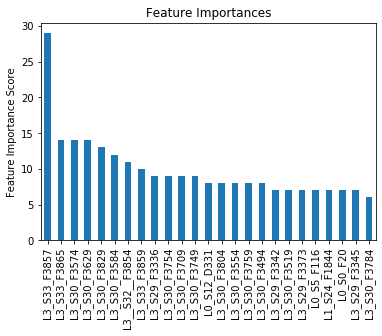

In [100]:
xgb1 = XGBClassifier(learning_rate=0.05,
                     base_score=0.0056,
                     n_estimators=50,
                     max_depth=7,
                     min_child_weight=1,
                     gamma=0.1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=3,
                     seed=1)
modelfit(xgb1, X_all, y_all)

In [16]:
import pickle
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


[0]	train-auc:0.850117+0.0321536	test-auc:0.625449+0.00469825
[1]	train-auc:0.907921+0.00924154	test-auc:0.618973+0.0177543
[2]	train-auc:0.942487+0.0092761	test-auc:0.615615+0.00479045
[3]	train-auc:0.969292+0.00348523	test-auc:0.600747+0.0109193
[4]	train-auc:0.978344+0.00625632	test-auc:0.602053+0.024845
[5]	train-auc:0.984444+0.00835666	test-auc:0.582752+0.0252754
[6]	train-auc:0.988249+0.00502358	test-auc:0.571896+0.0145142
[7]	train-auc:0.99037+0.0042931	test-auc:0.57869+0.011168
[8]	train-auc:0.994539+0.00128098	test-auc:0.573329+0.0130528
[9]	train-auc:0.996462+0.000411051	test-auc:0.575337+0.0270372
[10]	train-auc:0.997258+7.68433e-05	test-auc:0.585352+0.0133692
[11]	train-auc:0.998073+1.69378e-05	test-auc:0.59884+0.0159171
[12]	train-auc:0.998567+0.000103984	test-auc:0.601587+0.0253723
[13]	train-auc:0.99881+0.000228714	test-auc:0.599224+0.0295778
[14]	train-auc:0.9991+0.000104148	test-auc:0.60744+0.0285222
[15]	train-auc:0.999404+4.23399e-05	test-auc:0.6154+0.0321178
[16]	tr

C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.0056, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=1,
              silent=None, subsample=0.8, verbosity=1)

Model Report
AUC Score (Train): 1.000000
L3_S33_F3857    30
L3_S33_F3859    22
L3_S30_F3574    19
L3_S30_F3759    18
L3_S33_F3865    17
L3_S30_F3629    16
L3_S30_F3754    13
L3_S30_F3749    13
L0_S4_F104      12
L3_S30_F3709    12
L3_S30_F3829    12
L3_S29_F3373    12
L3_S29_F3318    11
L3_S32_F3850    11
L3_S30_F3584    11
L3_S30_F3809    11
L3_S30_F3744    11
L0_S0_F18       10
L3_S30_F3494    10
L0_S2_F60        9
L1_S24_F1514     9
L3_S29_F3336     9
L3_S30_F3509     9
L3_S30_F3524     9
L3_S35_F3889     8


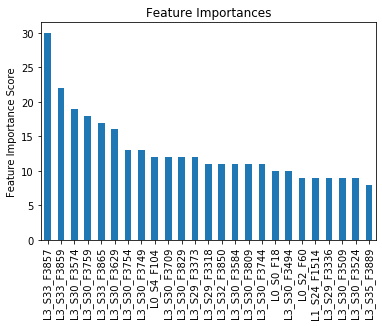

In [36]:

xgb1 = XGBClassifier(learning_rate=0.05,
                     base_score=0.0056,
                     n_estimators=50,
                     max_depth=10,
                     min_child_weight=1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=3,
                     seed=1)
modelfit(xgb1, X_all, y_all)

In [18]:
import pickle
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics 

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

[0]	train-auc:0.827238+0.0224249	test-auc:0.608725+0.0370183
[1]	train-auc:0.872912+0.0168512	test-auc:0.635486+0.0507584
[2]	train-auc:0.905815+0.00455416	test-auc:0.663363+0.0299221
[3]	train-auc:0.928631+0.0116673	test-auc:0.678089+0.00162537
[4]	train-auc:0.942106+0.00743683	test-auc:0.710244+0.0372378
[5]	train-auc:0.951097+0.0120331	test-auc:0.715778+0.051563
[6]	train-auc:0.957802+0.011608	test-auc:0.712465+0.0509561
[7]	train-auc:0.966728+0.00835759	test-auc:0.724066+0.0360615
[8]	train-auc:0.968181+0.00784922	test-auc:0.723963+0.0402496
[9]	train-auc:0.972487+0.00553852	test-auc:0.728013+0.0357691
[10]	train-auc:0.976591+0.0050623	test-auc:0.73022+0.0373601
[11]	train-auc:0.978321+0.00478354	test-auc:0.720209+0.0365839
[12]	train-auc:0.980262+0.00493385	test-auc:0.720029+0.0400736
[13]	train-auc:0.982868+0.00381328	test-auc:0.724999+0.0327668
[14]	train-auc:0.984511+0.00374568	test-auc:0.727766+0.0284782
[15]	train-auc:0.985324+0.00307547	test-auc:0.722623+0.0320198
[16]	train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.0056, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=3, seed=1, silent=None,
       subsample=0.8, verbosity=1)

Model Report
AUC Score (Train): 0.998531
L3_S35_D3886    50
L3_S29_D3316    44
L3_S33_D3856    42
L0_S0_D1        35
L3_S36_D3919    32
L3_S32_D3852    27
L0_S2_D34       24
L0_S7_D137      23
L0_S9_D152      22
L0_S3_D70       22
L2_S26_D3037    22
L3_S29_D3474    21
L0_S6_D120      21
L0_S5_D115      21
L0_S4_D106      21
L1_S24_D1583    20
L0_S1_D26       19
L0_S11_D280     18
L0_S10_D216     18
L3_S34_D3875    17
L1_S24_D1809    15
L1_S24_D1511    15
L0_S15_D395     14
L0_S19_D454     14
L0_S12_D331     13


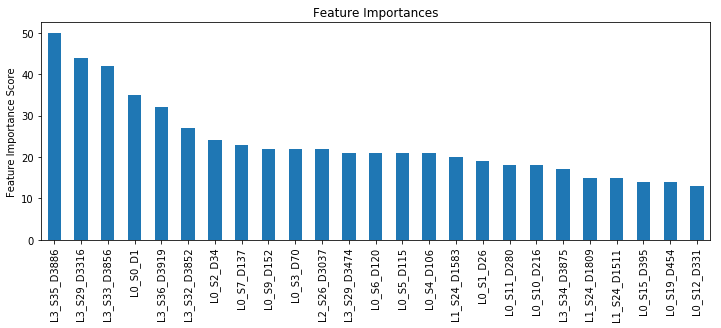

In [19]:
y_all = pd.read_csv("D:/Project/Sample data/pkl/labels_y.csv", index_col=0,)

pkl_file3 = open('D:/Project/Sample data/train_date_df/train_date_df.pkl', 'rb')
X_all = pickle.load(pkl_file3)

xgb1 = XGBClassifier(learning_rate=0.05,
                     base_score=0.0056,
                     n_estimators=50,
                     max_depth=10,
                     min_child_weight=1,
                     gamma=0.1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=3,
                     seed=1)
modelfit(xgb1, X_all, y_all)

In [4]:
import pickle
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics   

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [5]:
y_all = pd.read_csv("D:/Project/Sample data/pkl/labels_y.csv", index_col=0,)

pkl_file3 = open('D:/Project/Sample data/train_cat_df/train_cat_df.pkl', 'rb')
X_all = pickle.load(pkl_file3)

xgb1 = XGBClassifier(random_state=False)
#modelfit(xgb1, X_all, y_all)
xgb1.fit(X_all, y_all)

XGBoostError: Invalid Parameter format for seed expect int but value='False'

In [40]:
from xgboost import plot_importance
from matplotlib import pyplot
print(xgb1.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


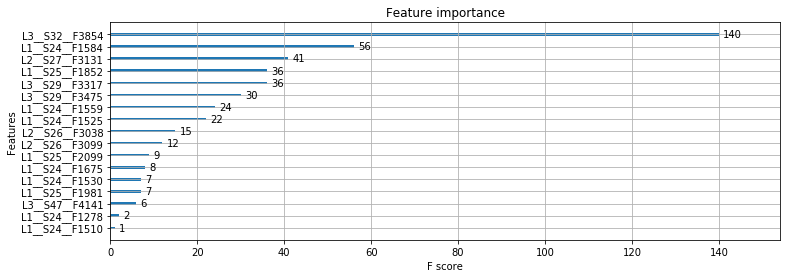

In [41]:

plot_importance(xgb1)
pyplot.show()

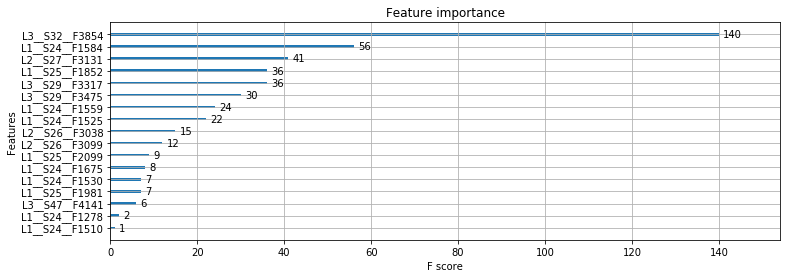

In [32]:
plot_importance(xgb1)
pyplot.show()

[0]	train-auc:0.489881+0.0113328	test-auc:0.478065+0.0210124
[1]	train-auc:0.547309+0.042374	test-auc:0.465291+0.0122166
[2]	train-auc:0.544926+0.0482293	test-auc:0.478382+0.0622256
[3]	train-auc:0.566091+0.0372623	test-auc:0.504701+0.0399694
[4]	train-auc:0.562429+0.0361501	test-auc:0.491234+0.0260406
[5]	train-auc:0.567695+0.0292234	test-auc:0.497636+0.0278756
[6]	train-auc:0.568322+0.0293462	test-auc:0.498062+0.0277611
[7]	train-auc:0.568742+0.0282105	test-auc:0.495925+0.0264914
[8]	train-auc:0.573288+0.0254048	test-auc:0.494858+0.024302
[9]	train-auc:0.575445+0.028674	test-auc:0.53869+0.0550025
[10]	train-auc:0.575839+0.0291903	test-auc:0.538718+0.054974
[11]	train-auc:0.578667+0.0295697	test-auc:0.502056+0.0172334
[12]	train-auc:0.579162+0.0291013	test-auc:0.541247+0.0553582
[13]	train-auc:0.593321+0.0165166	test-auc:0.545514+0.0527032
[14]	train-auc:0.592388+0.013467	test-auc:0.548722+0.0507482
[15]	train-auc:0.595979+0.0149097	test-auc:0.54673+0.0535422
[16]	train-auc:0.594927+0

C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.0056, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=50, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=1,
              silent=None, subsample=0.5, verbosity=1)

Model Report
AUC Score (Train): 0.657006
L2__S26__F3038    33
L3__S29__F3317    24
L3__S29__F3475    20
L2__S26__F3099    19
L1__S24__F1584    16
L2__S27__F3131    11
L1__S24__F1510    10
L1__S24__F1530    10
L1__S24__F1559     5
L3__S29__F3478     5
L1__S24__F1675     4
L2__S26__F3042     4
L1__S24__F1588     2
L3__S29__F3320     2
L3__S47__F4141     2
L1__S24__F1592     1
L1__S24__F1525     1
L2__S27__F3135     1
L1__S24__F1679     1
L3__S29__F3323     1


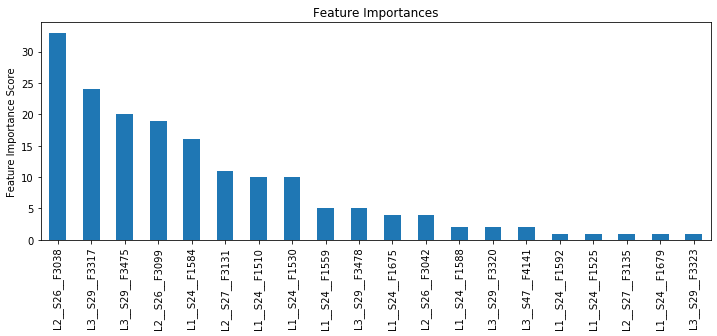

In [14]:
y_all = pd.read_csv("D:/Project/Sample data/pkl/labels_y.csv", index_col=0,)

pkl_file3 = open('D:/Project/Sample data/train_cat_df/train_cat_df.pkl', 'rb')
X_all = pickle.load(pkl_file3)

xgb1 = XGBClassifier(learning_rate=0.05,
                     base_score=0.0056,
                     n_estimators=50,
                     max_depth=10,
                     min_child_weight=3,
                     subsample=0.5,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=3,
                     seed=1)
modelfit(xgb1, X_all, y_all)